### DataSet

- 구글 플레이 내 미소 이용자 리뷰 5200건
- 수집 기간: 2019-09 ~ 2020.08
- 컬럼:
    - customer_id
    - date: 리뷰 남긴 날짜
    - rating: 평점
    - real_review: 리뷰 텍스트 데이터

In [1]:
df_miso_reviews_final = pd.read_csv("./df_miso_reviews_final.csv", index_col=0)

In [110]:
#df_miso_reviews_final

In [3]:
df_miso_reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  5200 non-null   object
 1   date         5200 non-null   object
 2   rating       5200 non-null   int64 
 3   real_review  5200 non-null   object
 4   response     5200 non-null   object
dtypes: int64(1), object(4)
memory usage: 243.8+ KB


In [4]:
# date: object -> type function

def time_format(t):
    

    import datetime
    
    datetimed_style = datetime.datetime.strptime(t, '%Y년 %m월 %d일')
    
    return datetimed_style


In [5]:
df_miso_reviews_final['date(clean)'] = df_miso_reviews_final['date'].apply(time_format)

In [111]:
#df_miso_reviews_final

In [19]:
# service progress by year, month, day

df_miso_reviews_final['year'] = [date.year for date in df_miso_reviews_final['date(clean)']]
df_miso_reviews_final['month'] = [date.month for date in df_miso_reviews_final['date(clean)']]
df_miso_reviews_final['day'] = [date.day for date in df_miso_reviews_final['date(clean)']]
df_miso_reviews_final['weekday'] = [date.strftime('%A') for date in df_miso_reviews_final['date(clean)']]

In [9]:
df_miso_reviews_final['month'].unique()

array([ 8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9], dtype=int64)

In [12]:
df_sorted_month = df_miso_reviews_final.groupby(by='month').agg({'customer_id': 'count'}).sort_values('customer_id', ascending = False).reset_index()
df_sorted_month['count'] = df_sorted_month['customer_id']

In [14]:
df_sorted_month_fin = df_sorted_month[['month', 'count']]
df_sorted_month_fin

,month,count
0,10,616
1,9,539
2,8,537
3,11,512
4,7,485
5,6,405
6,1,386
7,5,365
8,12,357
9,4,341


Text(0.5, 1.0, 'Serivce Frequency by month')

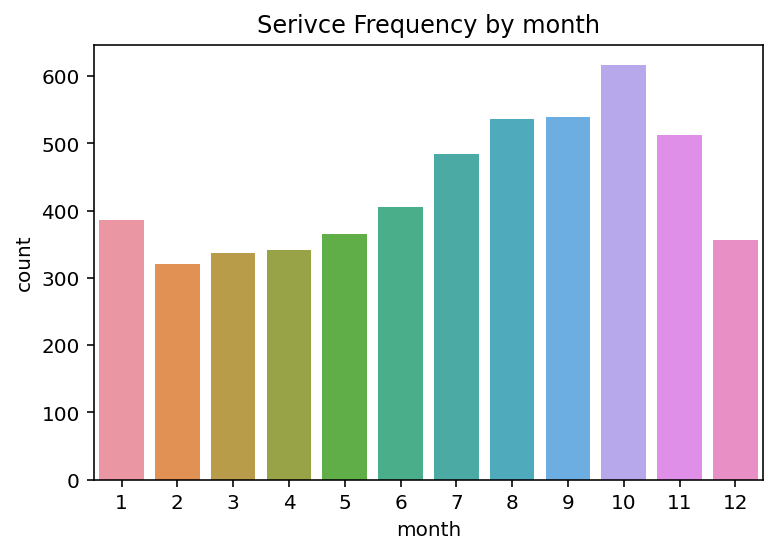

In [17]:
import seaborn as sns

sns.barplot(x = 'month', y='count', data=df_sorted_month_fin).set_title('Serivce Frequency by month')

#### 서비스량이 가장 많은 달은 10월, 주로 가을에 서비스 이용

#### 코로나19와 관련해서 첫 국내 확진자 발생(1/20) 전까진 서비스 이용률이 386건 -> 320건으로 76건 줄어든 후 6월까지 이어짐  

#### 코로나가 잠잠해진 6월부터는 400건을 넘기면서 8월까지 537건으로 증가. 9월부터는 추이를 지켜봐야 할 것 같음

In [41]:
df_sorted_weekday = df_miso_reviews_final.groupby('weekday').agg({'customer_id': 'count'}).sort_values('customer_id', ascending = False).reset_index()
df_sorted_weekday['count'] = df_sorted_weekday['customer_id']
df_sorted_weekday2 = df_sorted_weekday[['weekday', 'count']]
df_sorted_weekday2

,weekday,count
0,Wednesday,864
1,Thursday,802
2,Monday,761
3,Tuesday,756
4,Friday,743
5,Saturday,687
6,Sunday,587


In [45]:
# seaborn type
print('Seaborn version : ', sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.10.1


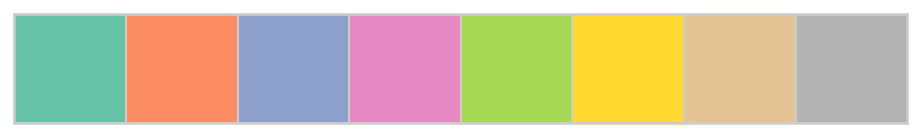

In [46]:
current_palatte = sns.color_palette('Set2')
sns.palplot(current_palatte)

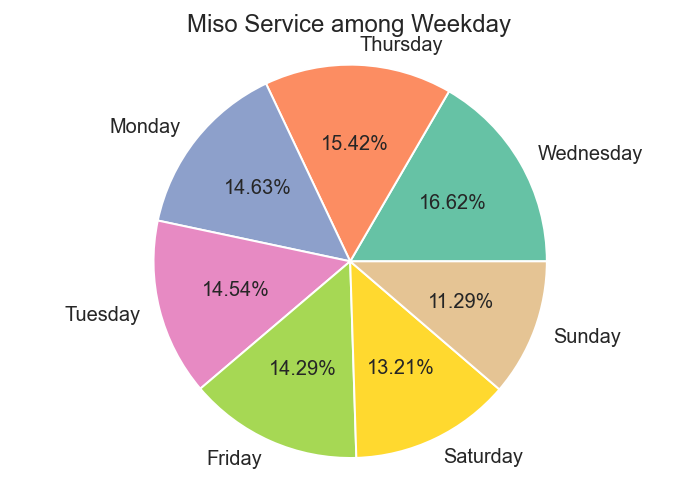

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt



group_colors = current_palatte


plt.pie(df_sorted_weekday2['count'],
       labels = df_sorted_weekday2['weekday'],
       colors = group_colors,
       autopct = '%1.2f%%',
       textprops = {'fontsize': 10})

plt.axis('equal')
plt.title('Miso Service among Weekday')
plt.show()

#### 대체적으로 주말보다는 평일에 서비스를 많이 이용한다

In [51]:
df_miso_ratings = df_miso_reviews_final.groupby('rating').agg({'customer_id': 'count'}).sort_values('customer_id', ascending=False).reset_index()
df_miso_ratings['count'] = df_miso_ratings['customer_id']
df_miso_ratings2 = df_miso_ratings[['rating', 'count']]
df_miso_ratings2

,rating,count
0,5,4737
1,1,336
2,4,69
3,2,30
4,3,28


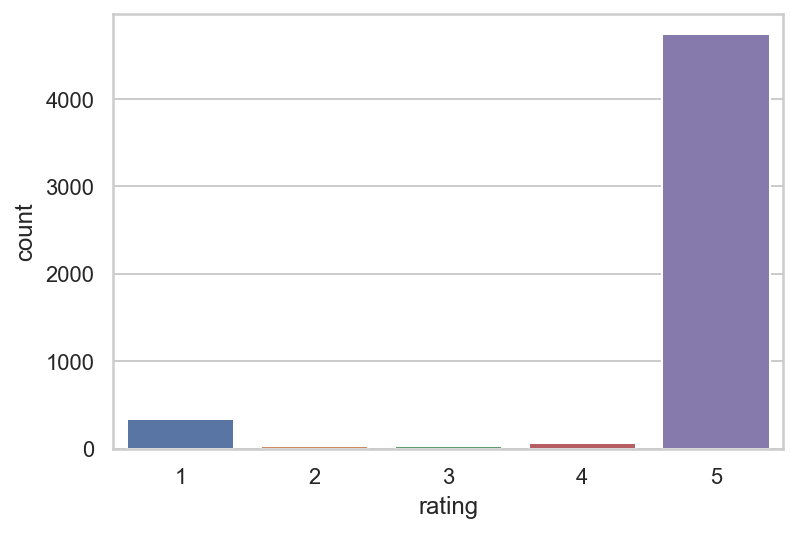

In [52]:
sns.barplot(x='rating', y='count', data=df_miso_ratings2)

#### 5점과 그 외의 점수 비율이 너무 차이가 많이 남 -> 1점을 vs 5점을 홀로

In [89]:
high_rate_review = df_miso_reviews_final[df_miso_reviews_final['rating'] == 5]['real_review']
low_rate_review = df_miso_reviews_final[df_miso_reviews_final['rating'] == 1]['real_review']

In [90]:
len(high_rate_review), len(low_rate_review)

(4737, 336)

In [91]:
low_rate_review[:10]

0      방문견적 예약했는데 온다는 말도 없고 예약 시간은 다가오는데 집에 있는지 언제 도착...
14     이상한 아줌마들 진짜 많네요 직원 관리좀 하세요 청소 안쓰느니만 못한 이상한 클리너...
27     최악 특히 충북쪽은 신청하지마세요. 청소도구 다 갔다놓았는데 청소도구도 못찾고......
39     🚫 정말 최악의 어플입니다 🚫 안 좋은 점 하나하나 말씀드리자면 청소도구함 준비한 ...
42                 실시간응답도이틀째 없고상세견적도없고업체연락처도없고어떻게신청하란거죠?
43                       예약취소를 정말 일찍도 말해줌 일정관리도 안됩니까 여기는
50     취소 잘눌르세요 :) CS교육좀 시키고요 그딴 마인드로 뭘 청소합니다. 마인드가 드...
55     예전에 미소를 한번 이용하고 만족스러워서 이번에는 이사견적도 문의드렸는데 모든 불편...
132    개떡 같이 청소해주고. 정말 어이가 없어서....내가 청소하러 오신분들한테 청소하는...
133    아니 장난하는것도아니고 저번부터 배정됐다고 해놓고 피드백없이 안와서 전화하니까 결제...
Name: real_review, dtype: object

In [92]:
import re

# 한글과 영문만 가능한 것으로(^ = not)
high_rate_review = high_rate_review.apply(lambda x:re.sub('[^가-힣\s\d]',"",x))
low_rate_review = low_rate_review.apply(lambda x:re.sub('[^가-힣\s\d]',"",x))

In [93]:
high_rate_review[:10]

1                            금액도 합당하고 청소도 디테일있게 잘 해주시네요
2                              전문가 분들이라 퀄리티 높게 청소 해주시네요
3               정기적으로 이용중입니다  청소 관련 업체중 제일 깔끔하게잘 해주시네요 
4     급하게 청소 이용받아본건데요 마음에 들게 잘 해주셔서 정기적으로 사용해볼까 고려 하...
5                             좋은 서비스라 윗집 아랫집 다 추천 해줬습니다
6                     이정도 금액에 이정도 서비스를 해주시다니 가성비 정말 좋네요
7             스케줄 정하기도 편하고  금액도 이정도면 저렴한편이라 자주 사용하고 있어요
8     이거 이용하니까  라이프가 달라지네요 주말에 시간도 많이 생기고  또 청소 신경을 ...
9                     청소 맡기실거면 이거 이용해보세요  청소 정말 잘 해주시네요
10    맞벌이 부부라 청소는 어쩔수 없이 맡기게 되었는데요  맡겨보니까 편하기도 하고 깔끔...
Name: real_review, dtype: object

In [122]:
low_rate_review[14]

'이상한 아줌마들 진짜 많네요 직원 관리좀 하세요 청소 안쓰느니만 못한 이상한 클리너도 많이옴 채팅시스템때문에 요일 변경도 제대로 안되던데 5천원 할인쿠폰으로 때우고  심지어 콜센터 에어컨도 안틀어주는지 콜직원이 나한테 짜증부림 일년넘게 사용중이었는데 하도 이상한 사람 많이오고 와서 말들도 왜이렇게 많은지 중국아줌마들 청소하기 싫은가봄청소보다 스트레스를 더 많이 받아서 요즘 갈아탈까 생각중 별 한개도 아깝다'

In [95]:
#!pip install konlpy
#!pip install wordcloud
#!pip install image
#!pip install wordcloud

In [96]:
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [97]:
from konlpy.tag import Okt;

low_tagger = Okt()
high_tagger = Okt()

In [98]:
def get_word_low_rating(sentence):
    nouns = low_tagger.nouns(sentence)
    return [noun for noun in nouns if len(noun) > 1]

def get_word_high_rating(sentence):
    nouns = high_tagger.nouns(sentence)
    return [noun for noun in nouns if len(noun) > 1]

In [99]:
low_countvector = CountVectorizer(tokenizer=get_word_low_rating, max_features=300)
low_tdf = low_countvector.fit_transform(low_rate_review)
low_words = low_countvector.get_feature_names()

In [100]:
low_words[:5]

['가격', '가사', '가시', '가요', '가입']

In [101]:
count_mat = low_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
low_rating_word_count = list(zip(low_words, count))
low_rating_word_count = sorted(low_rating_word_count, key=lambda t:t[1], reverse=True)

In [102]:
low_rating_word_count[:15]

[('청소', 284),
 ('취소', 133),
 ('예약', 119),
 ('시간', 99),
 ('연락', 97),
 ('서비스', 95),
 ('클리', 90),
 ('이용', 84),
 ('고객', 77),
 ('업체', 76),
 ('리뷰', 73),
 ('최악', 60),
 ('도우미', 59),
 ('미소', 59),
 ('전화', 58)]

In [103]:
high_countvector = CountVectorizer(tokenizer=get_word_high_rating, max_features=300)
high_tdf = high_countvector.fit_transform(high_rate_review)
high_words = high_countvector.get_feature_names()

count_mat = high_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
high_rating_word_count = list(zip(high_words, count))
high_rating_word_count = sorted(high_rating_word_count, key=lambda t:t[1], reverse=True)

In [104]:
high_rating_word_count[:15]

[('청소', 3098),
 ('이용', 1662),
 ('미소', 1175),
 ('서비스', 855),
 ('정말', 632),
 ('시간', 611),
 ('가격', 444),
 ('진짜', 406),
 ('예약', 398),
 ('생각', 369),
 ('해주시', 366),
 ('정기', 349),
 ('추천', 298),
 ('처음', 286),
 ('업체', 285)]

### word cloud 그리기

In [105]:
low_rating_document = low_rate_review.values
high_rating_document = high_rate_review.values

#### 5점 준 고객들의 리뷰

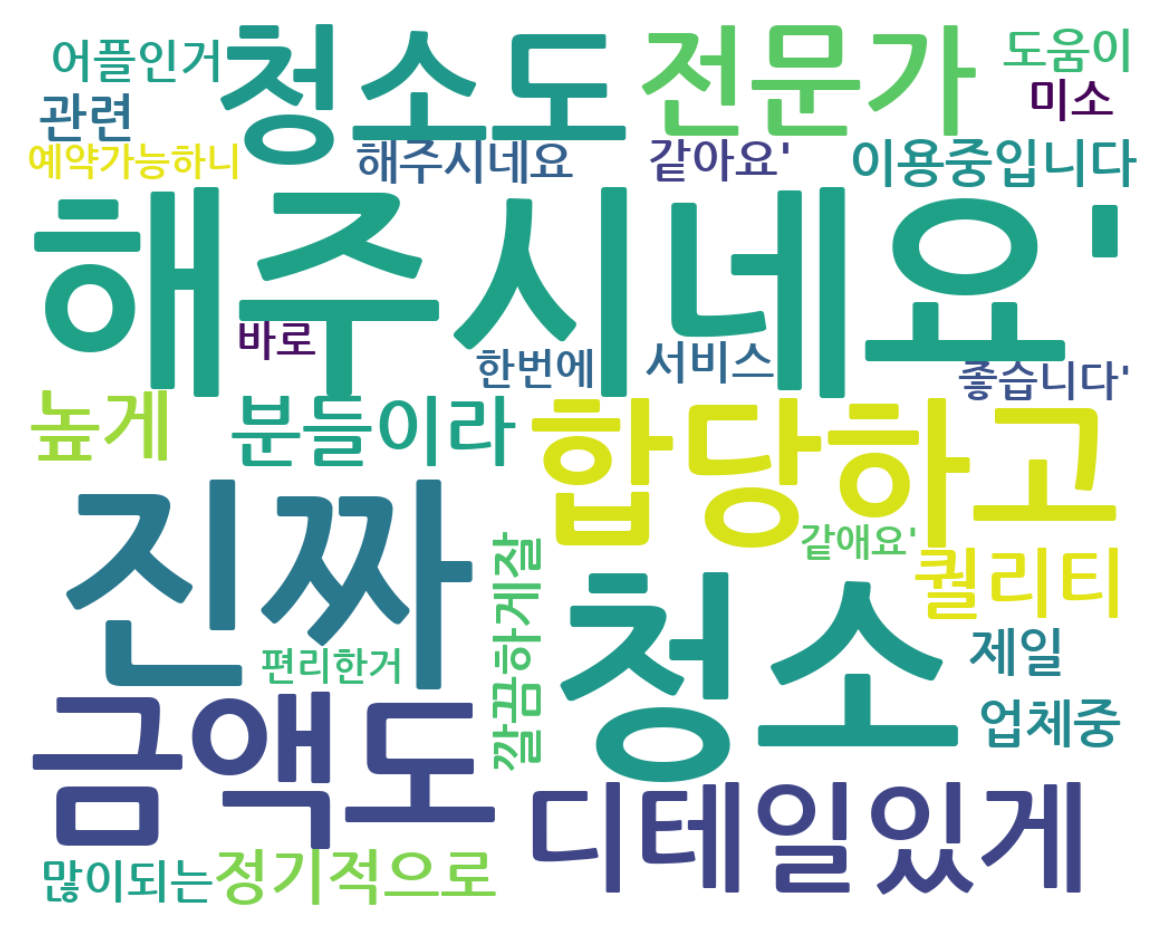

In [106]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path).generate(np.array2string(high_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

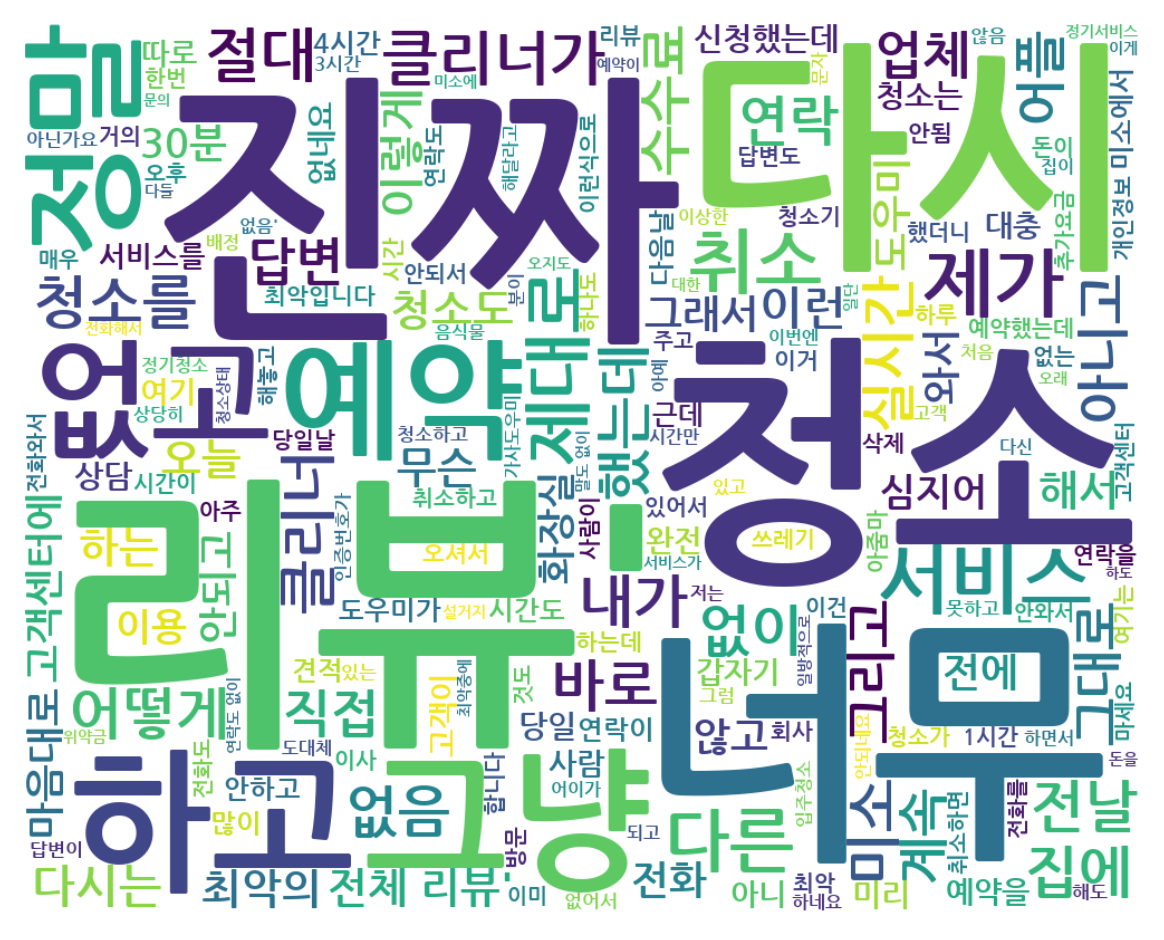

In [107]:
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path).generate(np.array2string(low_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 5점을 준 고객들은 quality와 합당한 가격에 만족했고, 1점을 준 고객들은 대충, 수수료, 추가요금, 개인정보 등에 이야기함

In [123]:
4737/5200

0.9109615384615385

### 분석결과

- 총 분석 리뷰: 5200건(2019.09 ~ 2020.08)
- 가을에(특히 10월)에 서비스 사용량이 많았다
- 주로 평일(골고루)에 서비스를 이용하고, 주말에는 상대적은 적게 서비스를 사용함
    - 주말에는 집에서 쉬고, 평일에 집이 빈(?) 시간에 서비스를 운영하는 것 같음
- 5점을 준 사람들은 91%인데 비해 리뷰를 많이 남기는 것 같진 않다. 하지만 그중에서 합리적 가격과 퀄리티에 만족한 것 같다
- 1점을 준 사람들은 불만사항을 상세히 적은 것같다. 추가요금, 수수료 등에 불만이 있는 것 같고 고객센터의 서비스에도 불만이 있는 것 같다
- Miso 서비스도 코로나19 영향을 받은 것 같고 발병 추이에 따라 증감을 보임. 
- 현재 작년 9월과 비슷한 500건 대 서비스 이용률이지만 다시 코로나19 확진자가 급속하게 증가하므로 올해 9월부터 유의깊게 지켜봐야 할 것 같음
- 코로나19 전파를 걱정하는 고객들을 위해 위생 및 방역 등의 철저한 관리를 진행해서 홍보해야 할 것 같음